# **Linear Regression - SKLearn Diabetes Dataset**

The application of machine learning in medical fields such as cancer detection and diagnosis, drug research and development, and medical image analysis is nothing new. There are many start-ups here, as well as big players such as Google Health, DeepMind, and IBM Watson Health. Treating diseases is no small matter. Is the application of machine learning in the medical field really reliable? Practice is the only criterion for testing truth. Let’s try using machine learning to predict the course of diabetes.

![healthcare-ai-startups-to-watch](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/healthcare-ai-startups-to-watch.png)

We found a real data set online, which was collected by North Carolina State University in the United States in 2004. It contains the age, gender, body mass index (BMI), average blood pressure (BP) of 442 diabetic patients, and Six laboratory indicators including blood cholesterol concentration, a total of 10 characteristics.

![data-displaying](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/data-display.png)

In [ ]:
%matplotlib inline

import pandas as pd   
import numpy as np    
import sklearn        
import seaborn as sns  
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

So we know the that the target/response/dependent varialble to be predicted is a continuous numerical value which is a measure of disease progression after one year.

The features/independent variables we have are the 10 attributes from Age to serum measurement samples

In [ ]:
diabetes.feature_names    

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
diabetes.data.shape   

(442, 10)

In [ ]:
diabetes.target.shape

(442,)

In [ ]:
db_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

We created a pandas dataframe using the dataset.

In [ ]:
db_df.sample(5)    #checking a sample of the dataframe

age       sex       bmi        bp        s1        s2        s3  \
82  -0.016412 -0.044642 -0.035307 -0.026328  0.032830  0.017162  0.100183   
57  -0.027310 -0.044642 -0.063330 -0.050427 -0.089630 -0.104340  0.052322   
41  -0.099961 -0.044642 -0.067641 -0.108956 -0.074494 -0.072712  0.015505   
180 -0.038207  0.050680  0.004572  0.035644 -0.011201  0.005889 -0.047082   
75  -0.009147  0.050680 -0.030996 -0.026328 -0.011201 -0.001001 -0.021311   

           s4        s5        s6  
82  -0.039493 -0.070209 -0.079778  
57  -0.076395 -0.056153 -0.067351  
41  -0.039493 -0.049872 -0.009362  
180  0.034309  0.016307 -0.001078  
75  -0.002592  0.006207  0.027917

Note: As per dataset documentation: **"Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1)"**. That is the reason we see that the variables to have seemingly odd values,they are centered to bring them to a common scale.

**Add Dependent Variable to the dataset**

In [ ]:
db_df['Progression'] = diabetes.target #new column name 'Progression'

In [ ]:
db_df.sample(2) #checking the dataset once again.

age       sex       bmi        bp        s1        s2        s3  \
414  0.081666  0.050680  0.006728 -0.004534  0.109883  0.117056 -0.032356   
344 -0.107226 -0.044642 -0.011595 -0.040099  0.049341  0.064447 -0.013948   

           s4        s5        s6  Progression  
414  0.091875  0.054720  0.007207        131.0  
344  0.034309  0.007027 -0.030072        200.0

In [ ]:
db_df.isna().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

There are no missing values in the dataframe

In [ ]:
db_df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

       Progression  
count   442.000000  
mean    152.133484  
std      77.093005  
min      25.000000  
25%      87.000000  
50%     140.500000  
75%     211.500000  
max     346.000000

In [ ]:
db_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**Let us check the Linear correlation between the variables in the dataframe**

In [ ]:
corr = db_df.corr()
corr

age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335428  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241010  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395411  0.249777  0.261170   
bp           0.335428  0.241010  0.395411  1.000000  0.242464  0.185548   
s1           0.260061  0.035277  0.249777  0.242464  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185548  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257650  0.542207  0.659817   
s5           0.270774  0.149916  0.446157  0.393480  0.515503  0.318357   
s6           0.301731  0.208133  0.388680  0.390430  0.325717  0.290600   
Progression  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054   

                   s3        s4        s5        s6  Progression  
age         -0.075181  0.203841  0.270774  0.301731     0.187889  
sex         -0.379090  0.332115  0.149916  0.208133     0.043062  
bmi         -0.366811  0.413807  0.446157  0.388680     0.586450  
bp          -0.178762  0.257650  0.393480  0.390430     0.441482  
s1           0.051519  0.542207  0.515503  0.325717     0.212022  
s2          -0.196455  0.659817  0.318357  0.290600     0.174054  
s3           1.000000 -0.738493 -0.398577 -0.273697    -0.394789  
s4          -0.738493  1.000000  0.617859  0.417212     0.430453  
s5          -0.398577  0.617859  1.000000  0.464669     0.565883  
s6          -0.273697  0.417212  0.464669  1.000000     0.382483  
Progression -0.394789  0.430453  0.565883  0.382483     1.000000

**Let us visualize the correlation matrix for better understanding**

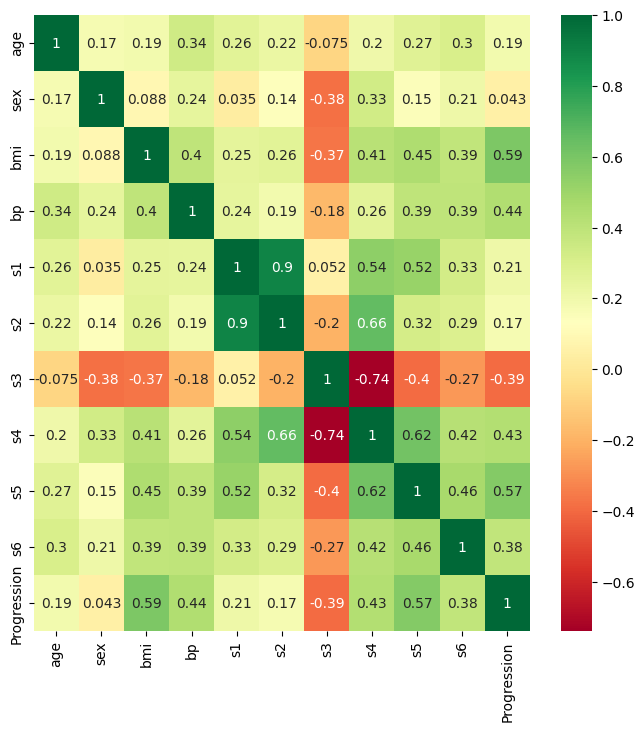

In [ ]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

This plot shows the linear correlation between the variables within themselves & also variables with the target 'Progression'. This could be a phase where the variables which are multicollinear can be eliminated. Since this example will serve as an example of methodology followed in builiding a model, we are not going for feature selection (which will be an article in itself).

### MODELLING

After reading the data, we first create a feature vector In machine learning codes, feature vectors Then, we split the data set through sklearn's train_test_split method, which is the green code in the picture. 75% of it is called the training set, which is X_train and y_train, and the remaining 25% is the test set, which is X_test and y_test.

**1) Create Features & Target**

In [ ]:
X = db_df.drop(labels='Progression', axis=1) 
y = db_df['Progression']

**2) Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


In machine learning, train-test split is a very common concept. It refers to dividing the data set into two parts when training a machine model. We usually only use a large part of the overall data set to train the model, such as the 75% above. It is called the training set, which is easy to understand. The focus is on the small portion of data reserved called the test set.

![dataset-illustration](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/dataset-illustration.png)

After the model is trained, we use the test set as a guinea pig to let the model predict. By comparing the prediction results with the labels originally included in the test set, we can know whether the model prediction is accurate. In this way, we can also evaluate the performance of the model when predicting new data that has never been seen before, which is the generalization performance of the model that you may have heard about.

After understanding the test set and training set, we can type two simple lines of code to train the model using linear regression.

**3) Create instance of a model**

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

**4) Fit the model**

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

After getting the model, we add a line of code, follow the above idea to predict the trained model on the test data set, and get a string of predicted labels.

**5) Predict the progression of diabetes based on test data**

In [ ]:
y_predicted = lm.predict(X_test)

In [ ]:
y_predicted

array([137.94908878, 182.533354  , 129.85295373, 292.5630923 ,
       124.86788221,  89.73883143, 255.95872903, 177.64545905,
        87.8884795 , 107.93961905,  93.26357149, 171.11939483,
        56.06305218, 207.22146277,  99.78918734, 131.7128101 ,
       215.86378125, 252.18591603, 201.56577486, 220.38870357,
       204.35745939,  88.9068622 ,  68.52958146, 190.02378425,
       153.91270751, 164.02719031, 192.83227597, 187.16765226,
        46.60570802, 109.3112624 , 175.04965912,  87.8076198 ,
       130.37646375, 186.56325253, 172.4733248 , 188.61448165,
       124.07175323, 119.16132637, 147.74400127,  59.27254049,
        70.90046253, 109.30036497, 170.97191153, 156.56943489,
       168.68664924,  61.5457612 ,  71.19039454, 111.94779801,
        54.32009551, 165.81267886, 152.78043565,  63.80587155,
       110.07651605, 108.64317139, 179.16381014, 156.79651896,
        93.29011121, 212.91986757, 119.28417849,  70.70890653,
       186.678156  , 205.65720098, 140.02890626, 106.54

At this time, you must be thinking how should we use the prediction results on these test sets? How can it tell us how well the model performs on the diabetes dataset? For example, we can put the original label y_test in the above test set and the predicted label y_predicted into a DataFrame in the simplest and crudest way, and then print them out for comparison. It seems that the effect is not very good. The difference between the predicted value and the test value in the printed lines is not small.

In [ ]:
y_concat = np.vstack((y_test, y_predicted))
y_concat

array([[219.        ,  70.        , 202.        , 230.        ,
        111.        ,  84.        , 242.        , 272.        ,
         94.        ,  96.        ,  94.        , 252.        ,
         99.        , 297.        , 135.        ,  67.        ,
        295.        , 264.        , 170.        , 275.        ,
        310.        ,  64.        , 128.        , 232.        ,
        129.        , 118.        , 263.        ,  77.        ,
         48.        , 107.        , 140.        , 113.        ,
         90.        , 164.        , 180.        , 233.        ,
         42.        ,  84.        , 172.        ,  63.        ,
         48.        , 108.        , 156.        , 168.        ,
         90.        ,  52.        , 200.        ,  87.        ,
         90.        , 258.        , 136.        , 158.        ,
         69.        ,  72.        , 171.        ,  95.        ,
         72.        , 151.        , 168.        ,  60.        ,
        122.        ,  52.        , 187.

In [ ]:
y_concatenated = {'actual': y_test, 
                  'predicted': y_predicted}
pd.DataFrame(y_concatenated)

actual   predicted
287   219.0  137.949089
211    70.0  182.533354
72    202.0  129.852954
321   230.0  292.563092
73    111.0  124.867882
..      ...         ...
45     53.0  131.610575
153    71.0  128.295451
239   262.0  166.000770
380    52.0  185.587464
278   102.0  111.886552

[111 rows x 2 columns]

However, this method is obviously too primitive. Is there a better way to evaluate the quality of the model?

***
There is a module called metrics in the sklearn library, which contains various evaluation indicators for evaluating the performance of machine learning models. For example, there are 14 types for regression problems, of which there are five most common ones.

![metrics-14-evaluation-indicators](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/metrics-14-evaluation-indicators.png)

Among the five commonly used indicators for regression problems, mean absolute error MAE is the abbreviation of mean absolute error, which is the average length of the blue line segment in the picture.

![MAE](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/MAE.png)

In the figure, the horizontal axis is the feature, the vertical axis is the label, the black dots are the data in the test data set, the red diagonal line is the trained linear model, and the intersection of the blue line and the red line is the label predicted by the model. .

![MAE-explain](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/MAE-explain.png)

MAE actually calculates the difference between the actual label and the predicted label of each data point in the data set, and then takes the average. The smaller this value is, the smaller the difference between the overall prediction results of the data and the real situation is, indicating that the performance of the regression model is better. This is actually a simple mathematical expression for us to judge the quality of the model based on intuition.

Mean absolute percentage error MAPE is the abbreviation of mean absolute percentage error. It is the length of the red line in the picture divided by the length of the blue line, and then the overall average is taken. MAPE, like MAE, is based on the difference between the actual label and the predicted label, which is the red line in the picture. However, each difference must first be divided by the value of its corresponding real label, which is the blue line in the picture. Then take the average overall. The smaller the value of MAPE, the smaller the percentage error in the model's prediction, which means that the model's prediction of the true value is more accurate.

![MAPE](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/MAPE.png)

Similarly, the mean square error MSE is the mean of the average areas of the red squares in the picture. It is actually related to the MAE. It means first getting the square of the difference between the real label and the predicted label, and then taking the overall average. The root mean square error RMSE is the square root of the MSE. Similarly, the smaller the MSE and RMSE, the better the performance of the model. 

![MSE](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/MSE.png)

R-squared, also known as the coefficient of determination, is an indicator used to measure the extent to which a linear regression model explains changes in data. It is calculated by subtracting 1 from the ratio of the sum of the red areas and the sum of the blue areas in the figure.

![coefficient-of-determination](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/coefficient-of-determination.png)

***

**6) Evaluate the Model**

In [ ]:
from sklearn import metrics as mt
import math

The first is the MAE mean absolute error. The mean_absolute_error method of sklearn corresponds to the abs and mean methods of NumPy. Our diabetes prediction model got 41.5.

In [ ]:
mae_numpy = (y_predicted - y_test).abs().mean()
mae_sklearn = mt.mean_absolute_error(y_test, y_predicted)

print("Mean Absolute Error")
print('mae_numpy   = ', mae_numpy)
print('mae_sklearn = ', mae_sklearn)

Mean Absolute Error
mae_numpy   =  41.548506859880604
mae_sklearn =  41.548506859880604


For the mean absolute percentage error MAPE, you can use the mean_absolute_percentage_error method of sklearn. Compared with MAE, the NumPy implementation only has one more step to remove y_test. The result of our model is 37.3%.

In [28]:
mape_numpy = ((y_predicted - y_test).abs() / y_test).mean() 
mape_sklearn = mt.mean_absolute_percentage_error(y_test, y_predicted)

print("Mean Absolute Percentage Error")
print('mape_numpy   = ', mape_numpy)
print('mape_sklearn = ', mape_sklearn)

Mean Absolute Percentage Error
mape_numpy   =  0.37310970433744683
mape_sklearn =  0.37310970433744683


The mean square error MSE can be calculated using the mean_squared_error method of sklearn or the square and mean methods of NumPy. The result is 2848.


In [ ]:
mse_numpy = np.square((y_predicted - y_test)).mean()
mse_sklearn = mt.mean_squared_error(y_test, y_predicted)

print("Mean Squared Error")
print('mse_numpy   = ', mse_numpy)
print('mse_sklearn = ', mse_sklearn)

Mean Squared Error
mse_numpy   =  2848.3106508475053
mse_sklearn =  2848.3106508475053


The root mean square error RMSE is the square root of the MSE, and the result we get is 53.37.


In [ ]:
rmse_numpy = math.sqrt(np.square((y_predicted - y_test)).mean())
rmse_sklearn = math.sqrt(mt.mean_squared_error(y_test, y_predicted))

print("Root Mean Squared Error")
print('rmse_numpy   = ', rmse_numpy)
print('rmse_sklearn = ', rmse_sklearn)

Root Mean Squared Error
rmse_numpy   =  53.369566710321955
rmse_sklearn =  53.369566710321955


Finally, there is the coefficient of determination R squared. Although this evaluation index is the most difficult to understand, it is enough to translate the mathematical formula into NumPy code, that is, sum sum, mean average, and then square. The R-squared value of our model is 0.4849.


In [29]:
r_squared_numpy = 1 - (np.sum((y_test - y_predicted) ** 2) \
                    / np.sum((y_test - np.mean(y_test)) ** 2))
r_squared_sklearn = mt.r2_score(y_test, y_predicted)

print("R Squared")
print('r_squared_numpy   = ', r_squared_numpy)
print('r_squared_sklearn = ', r_squared_sklearn)

R Squared
r_squared_numpy   =  0.4849058889476756
r_squared_sklearn =  0.4849058889476756


We calculated various evaluation indicators, such as R-squared is 0.48 and mean absolute percentage error MAPE is 37%. So what does this say about our model, whether it’s good or bad? Let me talk about the conclusion first. The effect of the model is very average. It is not very good or very bad. It can be regarded as making do with the level of use. Whether to adopt this model still needs to be decided based on the specific circumstances. Let’s first select the more representative MAPE to discuss in detail.

In [30]:
print("1) The Mean Squared Error of model is ", 
      mt.mean_squared_error(y_test, y_predicted), 
      "\nhence the Root Mean Squared Error (RMSE) of model is ",
      math.sqrt(mt.mean_squared_error(y_test, y_predicted)))

print("2) The Mean Absolute Error of model is ", 
      mt.mean_absolute_error(y_test, y_predicted))

print("3) The Mean Absolute Percentage Error of model is ", 
      mt.mean_absolute_percentage_error(y_test, y_predicted))

print("4) The R-Square score of the model is ",
      mt.r2_score(y_test, y_predicted))

1) The Mean Squared Error of model is  2848.3106508475053 
hence the Root Mean Squared Error (RMSE) of model is  53.369566710321955
2) The Mean Absolute Error of model is  41.548506859880604
3) The Mean Absolute Percentage Error of model is  0.37310970433744683
4) The R-Square score of the model is  0.4849058889476756


MAPE is obtained by dividing the length of the red line segment by the length of the blue line segment in the figure, and then taking the overall average. For each data point in the data set, the length of the blue line segment is its label value. This is a property of the data itself. Obviously it will not change no matter how the model changes. The red line segment is the difference between the label predicted by our model and the real label. Obviously our model cannot perfectly fit every data point in the data set, so this value will never be equal to 0.

![MAPE](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/MAPE.png)

Because we use a multiple linear regression model to predict diabetes, there is no way to display the image of the predicted model in two-dimensional space. But you can imagine with the help of simple linear regression. If the predicted model perfectly passes through every data point, then the length of all red lines will be 0, and the final MAPE will be 0, which means that the model is infinite. Close to perfection, which of course is impossible in practice.

![simple linear regression](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/simple-linear-regression.png)

In [31]:
coeff = pd.Series(lm.coef_, index = X_train.columns)
intercept = lm.intercept_

In [32]:
print("Coefficients:")
print(coeff)
print("")
print("Intercept:")
print(intercept)

Coefficients:
age     47.749681
sex   -241.990907
bmi    531.971063
bp     381.562862
s1    -918.502905
s2     508.257783
s3     116.950164
s4     269.492303
s5     695.808117
s6      26.324582
dtype: float64

Intercept:
151.6651755919933


At this point, the MAPE of our model does not seem to be ideal, but even so, it cannot be concluded that the performance of this model is not good. In fact, in addition to evaluation indicators, evaluating whether a model is good or bad also requires a comprehensive consideration of many factors related to the problem being solved.

If we are just a data scientist or machine learning engineer, we generally cannot decide whether to adopt a machine learning model when analyzing data in medical or a certain professional field. At this time, we should hand over all information about the model, including evaluation indicators, to doctors and other professionals, allowing them to make comprehensive judgments and finally draw conclusions.

## Let us use another package called Statsmodel & build another model. Statsmodel
## package gives a better summary of the model parameters w.r.t Linear Regression

In [33]:
import statsmodels.api as sm

In [34]:
lm2 = sm.OLS.from_formula("Progression ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6", 
                          data=db_df)
trained_lm2 = lm2.fit()

In [35]:
predictions = trained_lm2.predict(X)

In [36]:
summary_model = trained_lm2.summary()
print(summary_model)

                            OLS Regression Results                            
Dep. Variable:            Progression   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           3.83e-62
Time:                        19:33:03   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.0

In previous issues, we calculated various evaluation indicators of the linear regression model for predicting diabetes, among which R square was 0.48. Generally speaking, if it is close to 1, it is very good, and if it is close to 0, it is very poor, so the 0.48 we get here indicates that the explanatory power of the model is at a medium level.

![efficiency-of-coefficient-of-determination](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/efficiency-of-coefficient-of-determination.png)

In other words, our model can explain part of the label variation, but there is still a considerable portion of the variation that is not explained by the model. The "explanation" here can also be understood loosely as correlation.

![correlation-interpretation](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/correlation-interpretation.png)

If you still remember, the features in the data set we used to predict the progression of diabetes include six laboratory indicators including age, gender, BMI, average blood pressure, and blood cholesterol concentration. Although we are not doctors, we have heard more or less that people with obesity, high blood pressure, hyperlipidemia or a genetic history are prone to diabetes, and these are all reflected in the data set. But factors such as poor eating habits, lack of exercise, and smoking are also associated with diabetes, but they were not included in the data set.

![diabetes](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/correlation-interpretation.png)

This actually shows that our data set itself is not comprehensive enough. It contains both features related to diabetes and those not related to diabetes, and there are also some other related features that are not included. Therefore, the R-squared value of the trained model will be a value of 0.48, which means that it can only explain the label in the question, that is, the progression of diabetes, to a certain extent. My statement here may be a bit far-fetched, but I hope it can help everyone understand the concept of R-squared in a more down-to-earth way with specific examples.

Like MAPE, there is actually no gold standard for R-squared that can simply tell us how well a model performs. For example, in the social sciences, an R-squared of 0.5 may mean that the model is good; in the financial field, it needs more than 0.7. In some fields, we even require R-squared to be above 0.9 to consider the model good enough. In the medical field, we also need to discuss with professionals with medical knowledge to determine the specific level of R-squared to judge the quality of the model, and ultimately determine whether to adopt the model we trained.

![good-for-R-squared-value](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/good-for-R-squared-value.png)

Finally, to summarize, in the past few issues, we trained a linear regression model to predict the progression of diabetes based on real data, learned the concepts of segmentation and evaluation indicators for test training data sets, and implemented evaluation analysis with code. . Although judging from the evaluation indicators obtained based on our limited medical knowledge, the effect of our model is average. But don’t worry. As early as 2004, Stanford University proposed an algorithm with better effects. We will never rashly use an algorithm with average effects on patients.

![least-angle-regression](https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/tutorials/code-for-videos/metrics-linear-regression-diabetes/least-angle-regression.png)